In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wine.csv',header=None,usecols=[0,1,2])
df.columns=['Class_Label','Alcohol','Malic_acid']
df.sample(5)

,Class_Label,Alcohol,Malic_acid
12,1,13.75,1.73
67,2,12.37,1.17
148,3,13.32,3.24
171,3,12.77,2.39
48,1,14.10,2.02


<Axes: xlabel='Alcohol', ylabel='Density'>

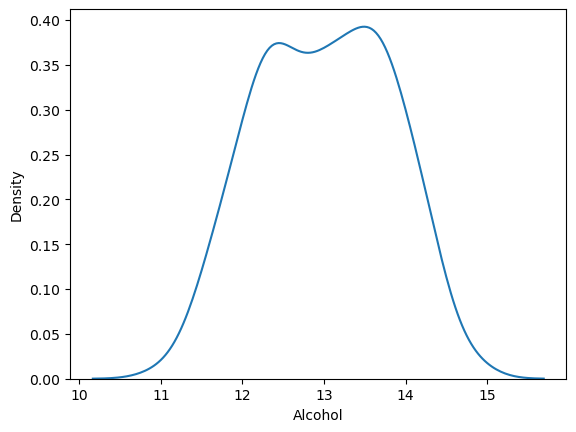

In [3]:
sns.kdeplot(df.Alcohol)

<Axes: xlabel='Malic_acid', ylabel='Density'>

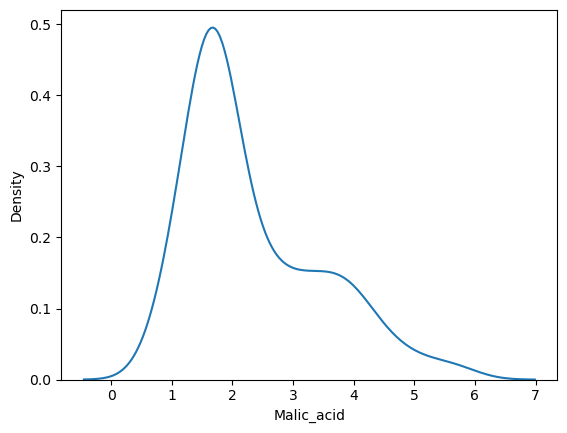

In [4]:
sns.kdeplot(df.Malic_acid)

<Axes: xlabel='Alcohol', ylabel='Malic_acid'>

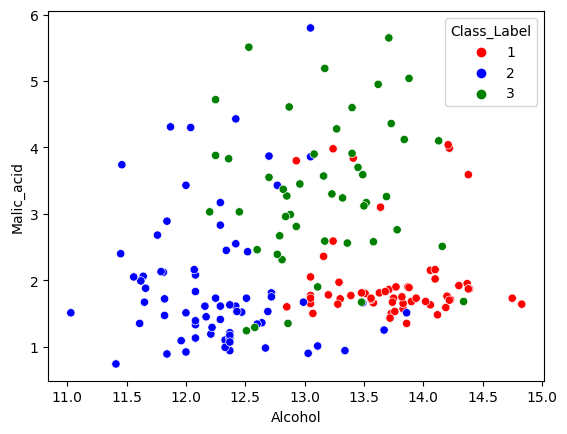

In [5]:
color_pallet=['red','blue','green']
sns.scatterplot(data=df,x='Alcohol',y='Malic_acid',hue='Class_Label',palette=color_pallet)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class_Label',axis=1),df.Class_Label,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [38]:
type(x_test_scaled)

numpy.ndarray

In [39]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)


In [40]:
x_train_scaled.head()

,Alcohol,Malic_acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


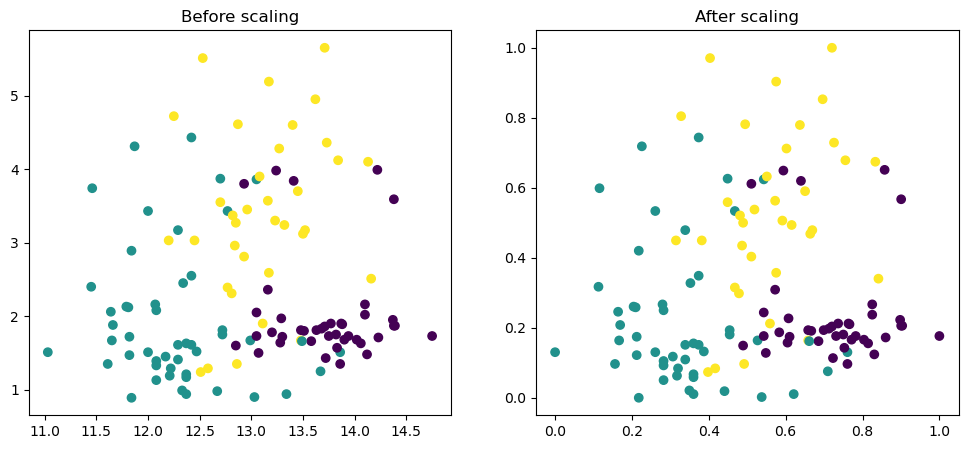

In [48]:
palette = sns.color_palette("Set1")  # You can choose a different palette if you prefer

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Alcohol'],x_train['Malic_acid'],c=y_train)
ax1.set_title("Before scaling")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic_acid'],c=y_train)
ax2.set_title("After scaling")
plt.show()